# Restoran Review Classification 

- Binary Text Classification

1. import dataset

- cause our dataset doesnt have label, so we set names=['sentence', 'label'] as label for only column 1 and 2

In [1]:
    import pandas as pd
    df = pd.read_csv('/tmp/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

2. show last five dataset

In [2]:
    df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


3. Split into dataset and datatraining 

- define attribute and label
- data testing 20%

In [2]:
    from sklearn.model_selection import train_test_split

    #atttribute and label
    kalimat = df['sentence'].values
    y = df['label'].values

    # split data training and testing
    kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

4. tokenization

- convert each kata in sentences to certain numeric in order to make text are understood by model

- ``Tokenizer(num_words=250, oov_token='x')`` 
  - num_words : parameter jumlah kata yang akan ditokenisasi (250 artinya only 250 kata yg paling sering muncul yg akan dikonversi dari seluruh kata pada dataset) 
  - oov_token : parameter yg berfungsi mengganti kata-kata yang tidak ditokenisasi into certain character. lebih baik mengganti unknown words with  certain word than informasi hilang because melewatkan that words 

- after that we change text into sequence using ``texts_to_sequences``

- then using ``pad_sequences`` to make each 
sequences have same length

In [3]:
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
     
    # tokenization
    tokenizer = Tokenizer(num_words=250, oov_token='x')
    tokenizer.fit_on_texts(kalimat_latih) 
    tokenizer.fit_on_texts(kalimat_test)
    
    # change text to sequences
    sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
    sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
    
    # make sequence have same lenght
    padded_latih = pad_sequences(sekuens_latih) 
    padded_test = pad_sequences(sekuens_test)

In [4]:
print(tokenizer.word_index)

{'x': 1, 'the': 2, 'and': 3, 'i': 4, 'was': 5, 'a': 6, 'to': 7, 'is': 8, 'this': 9, 'it': 10, 'of': 11, 'food': 12, 'not': 13, 'for': 14, 'in': 15, 'place': 16, 'good': 17, 'service': 18, 'we': 19, 'very': 20, 'my': 21, 'with': 22, 'had': 23, 'great': 24, 'that': 25, 'be': 26, 'so': 27, 'are': 28, 'were': 29, 'but': 30, 'have': 31, 'back': 32, 'you': 33, 'here': 34, 'they': 35, 'at': 36, 'on': 37, 'like': 38, 'go': 39, 'all': 40, 'time': 41, 'our': 42, 'will': 43, 'really': 44, 'as': 45, 'there': 46, 'just': 47, 'an': 48, 'their': 49, 'if': 50, 'best': 51, 'ever': 52, 'would': 53, 'friendly': 54, 'also': 55, 'never': 56, 'one': 57, 'only': 58, 'up': 59, 'restaurant': 60, 'nice': 61, 'your': 62, 'out': 63, 'no': 64, "don't": 65, 'from': 66, 'what': 67, 'again': 68, 'amazing': 69, 'been': 70, 'delicious': 71, 'did': 72, 'vegas': 73, 'which': 74, 'by': 75, 'pretty': 76, "i've": 77, 'when': 78, 'came': 79, 'experience': 80, 'some': 81, "i'm": 82, 'me': 83, 'us': 84, 'eat': 85, 'staff': 86,

5. Make model

- embeding : make ML Model understand makna each words and to group words with makna yg mirip agar berdekatan
- pengelompokkan ini dicapai dengan memetakan each words into vektor/array

- the embeding result is array 2 dimensions so we need ``flatten.layers`` to change it into 1 dimension

- but we using ``GlobalAveragePooling1D`` than ``flatten`` because this function work better in NLP case.

<br>

- jumlah perceptron pada hidden layer  

<br>

- sigmoid : activation function for two classification
- relu : default activation for ANN to speed up computation time   


In [5]:
    import tensorflow as tf
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(250, 16), 
        tf.keras.layers.GlobalAveragePooling1D(),
        # tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
 

- to understand our model we can see diagram model

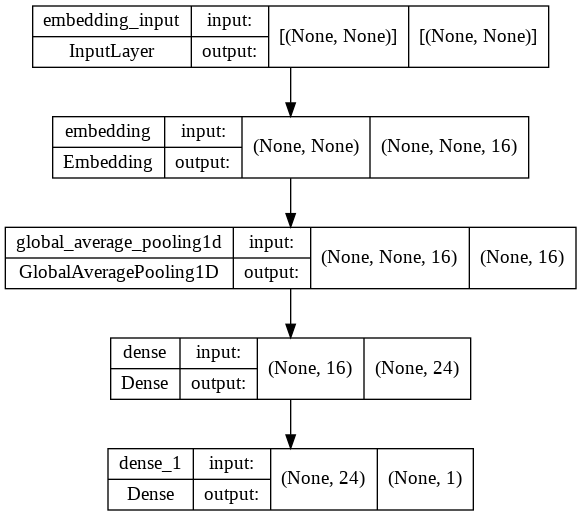

In [6]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

- show summary model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          4000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 4,433
Trainable params: 4,433
Non-trainable params: 0
_________________________________________________________________


- before model ready to train. it need several setting again. this add in compile stage

In [8]:
  model.compile(
      loss='binary_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

- start training model

In [9]:
 
history = model.fit(padded_latih, y_latih, 
                    epochs=30, 
                    validation_data=(padded_test, y_test), 
                    verbose=2)



Epoch 1/30
25/25 - 1s - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6919 - val_accuracy: 0.6750 - 983ms/epoch - 39ms/step
Epoch 2/30
25/25 - 0s - loss: 0.6914 - accuracy: 0.5487 - val_loss: 0.6878 - val_accuracy: 0.6400 - 61ms/epoch - 2ms/step
Epoch 3/30
25/25 - 0s - loss: 0.6887 - accuracy: 0.5800 - val_loss: 0.6842 - val_accuracy: 0.6750 - 73ms/epoch - 3ms/step
Epoch 4/30
25/25 - 0s - loss: 0.6846 - accuracy: 0.5950 - val_loss: 0.6776 - val_accuracy: 0.6650 - 64ms/epoch - 3ms/step
Epoch 5/30
25/25 - 0s - loss: 0.6783 - accuracy: 0.6488 - val_loss: 0.6698 - val_accuracy: 0.7150 - 75ms/epoch - 3ms/step
Epoch 6/30
25/25 - 0s - loss: 0.6695 - accuracy: 0.6350 - val_loss: 0.6593 - val_accuracy: 0.7300 - 74ms/epoch - 3ms/step
Epoch 7/30
25/25 - 0s - loss: 0.6565 - accuracy: 0.7312 - val_loss: 0.6437 - val_accuracy: 0.7400 - 93ms/epoch - 4ms/step
Epoch 8/30
25/25 - 0s - loss: 0.6396 - accuracy: 0.7450 - val_loss: 0.6237 - val_accuracy: 0.7700 - 78ms/epoch - 3ms/step
Epoch 9/30
25/25 - 0s 

- evaluation model

In [10]:
model.evaluate(padded_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8200


[0.3898555636405945, 0.8199999928474426]

5. Make Predictions

- prediction from data testing

In [12]:
import numpy as np

scores = model.predict(padded_test)[5]

np.round(scores[0],0)
 

1.0

- prediction from out of dataset

  - data yg masuk ke model harus disamakan dengan input model (format or preproscessing)

In [14]:
# data input
text = ['The chips and salsa were really good, the salsa was very fresh']

# preprocessing

# 1. tokenisation
sequences = tokenizer.texts_to_sequences(text)

print('word index')
print(tokenizer.word_index)

# 2. change into sequence
var_txt = tokenizer.texts_to_sequences(text)

print('\n text disesuaikan dengan index')
print(var_txt)

# 3. make input have same lenght
sequences_samapanjang = pad_sequences(var_txt, 
                                          padding='pre',
                                          maxlen=31)

print('\n disamakan pangjangnya dengan model')
print(sequences_samapanjang)

#do prediction
scores = model.predict(sequences_samapanjang)[0]

print('\n hasil prediction')

print(scores)
print(np.round(scores,0))

print('\n sesuaikan dengan label')

print(y_test[5])
print(kalimat_test[5])

word index
{'x': 1, 'the': 2, 'and': 3, 'i': 4, 'was': 5, 'a': 6, 'to': 7, 'is': 8, 'this': 9, 'it': 10, 'of': 11, 'food': 12, 'not': 13, 'for': 14, 'in': 15, 'place': 16, 'good': 17, 'service': 18, 'we': 19, 'very': 20, 'my': 21, 'with': 22, 'had': 23, 'great': 24, 'that': 25, 'be': 26, 'so': 27, 'are': 28, 'were': 29, 'but': 30, 'have': 31, 'back': 32, 'you': 33, 'here': 34, 'they': 35, 'at': 36, 'on': 37, 'like': 38, 'go': 39, 'all': 40, 'time': 41, 'our': 42, 'will': 43, 'really': 44, 'as': 45, 'there': 46, 'just': 47, 'an': 48, 'their': 49, 'if': 50, 'best': 51, 'ever': 52, 'would': 53, 'friendly': 54, 'also': 55, 'never': 56, 'one': 57, 'only': 58, 'up': 59, 'restaurant': 60, 'nice': 61, 'your': 62, 'out': 63, 'no': 64, "don't": 65, 'from': 66, 'what': 67, 'again': 68, 'amazing': 69, 'been': 70, 'delicious': 71, 'did': 72, 'vegas': 73, 'which': 74, 'by': 75, 'pretty': 76, "i've": 77, 'when': 78, 'came': 79, 'experience': 80, 'some': 81, "i'm": 82, 'me': 83, 'us': 84, 'eat': 85, '

In [ ]:
6. Save model

In [15]:
import joblib

joblib.dump(model,"/tmp/modelRestaurantReview.pkl")

INFO:tensorflow:Assets written to: ram://db02d946-b1e9-476f-9ca1-a385c225cf0e/assets


['/tmp/modelRestaurantReview.pkl']